## LINEAR REGRESSION ON CANDY DATA 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [DataLoading and description](#section2) <br>
3. [Importing the DataSets](#section3)<br>
4. [Overview](#section4)<br>
5. [Data PreProcessing](#section5)<br>
6. [Linear Regression](#section6)<br>
    - 6.1[Preparing X and y using pandas](#section601)<br>
    - 6.2 [Splitting X and y into training and test datasets.](#section602)<br>
    - 6.3 [Linear regression in scikit-learn](#section603)<br>
    - 6.4 [Interpreting Model Coefficients](#section604)<br>
    - 6.5 [Using the Model for Prediction](#section605)<br>
7. [Model evaluation](#section7)<br>
    

## 1. Problem Statement

The goal is to __predict winpercent__ of candy using __Linear Regression__

## 2.Data Loading And Description

- The data consits of the information about the candies.Various variables present in the dataset includes the competitorname,the flovours of the candies i.e  chocolate,fruity,caramal,nougat etc ,sugarpercent,pricepercent,winpercent.
- The dataset compromises of __85 observations of 13 columns__ .Below is a table showing names of all the columns and their description.

| Column Name     | Description                                               |
| -------------   |:-------------                                            :| 
| competitorname  | company's name                                            | 
| chocolate       | type of the candy                                         |  
| fruity          | type of the candy                                         | 
| caramel         | type of the candy                                         |   
| peanutyalmondy  | type of the candy                                         |
| nougat          | type of the candy                                         |
| crispedricewafer| type of the candy                                         |
| hard            | type of the candy                                         |
| bar             | type of the candy                                         |
| pluribus        | type of the candy                                         |
| sugarpercent    | percentage of the sugar in the candy                      |
| pricepercent    | counts the price percent                                  |
| winpercent      | what is the percentage of winning                         |

## Importing Packages

In [63]:
import sys
!{sys.executable} -m pip install pandas_profiling

In [64]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn import metrics


%matplotlib inline
from subprocess import check_output

 ## 3. Importing the DataSet

In [65]:
candy_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")

In [66]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [67]:
profile = pandas_profiling.ProfileReport(candy_data)
profile.to_file(outputfile="C:/project/candy_preprocessing.html")

## 4. OVERVIEW

In [86]:
profile

Number of variables,13
Number of observations,85
Total Missing (%),0.0%
Total size in memory,8.7 KiB
Average record size in memory,104.9 B
Numeric,3
Categorical,0
Boolean,9
Date,0
Text (Unique),1
Rejected,0


## Explanatory Data Analysis

## 5. DATA PREPROCESSING

In [71]:
85 - candy_data.count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [72]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [73]:
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


### Observation

There are 85 observations.

In [75]:
candy_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

 - _Dropping_ Columns _'Competitorname'_

In [76]:
candy = candy_data.drop(['competitorname'],axis =1)
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [77]:
candy_cat = candy_data.select_dtypes(include=['int64'])
candy_cat.columns.tolist()

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus']

## Bar Plots

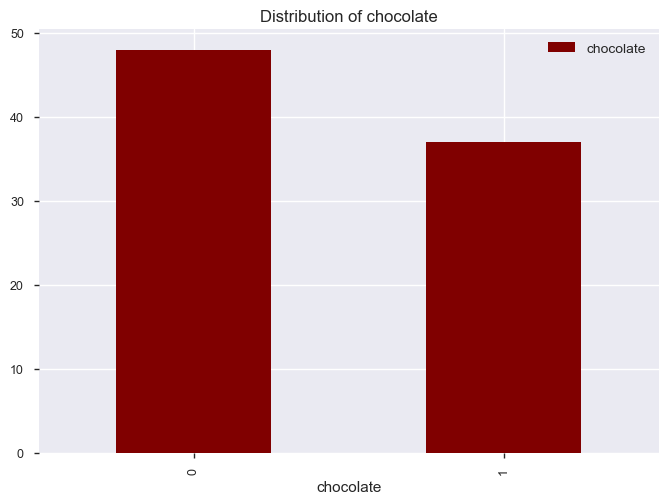

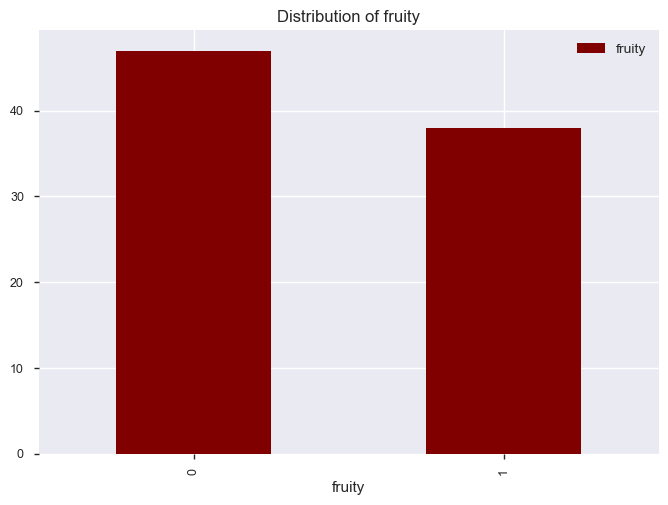

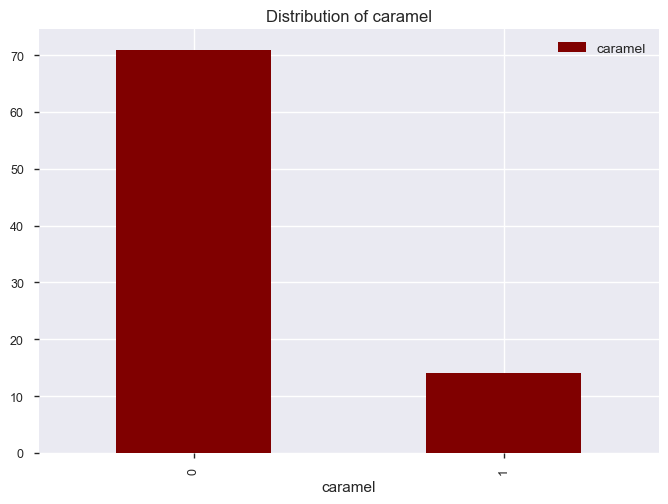

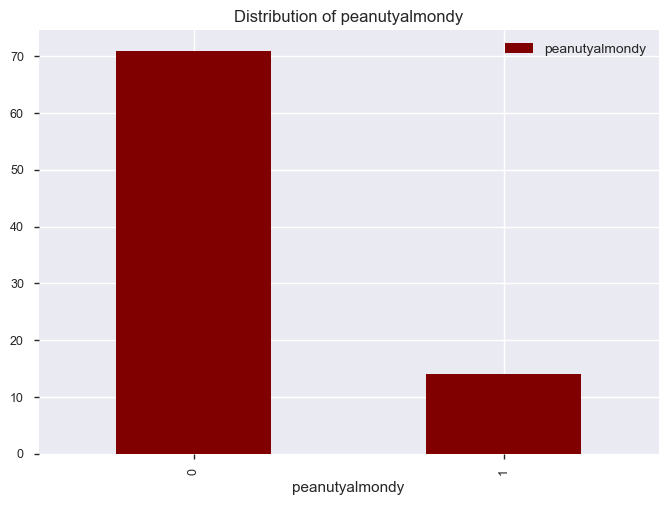

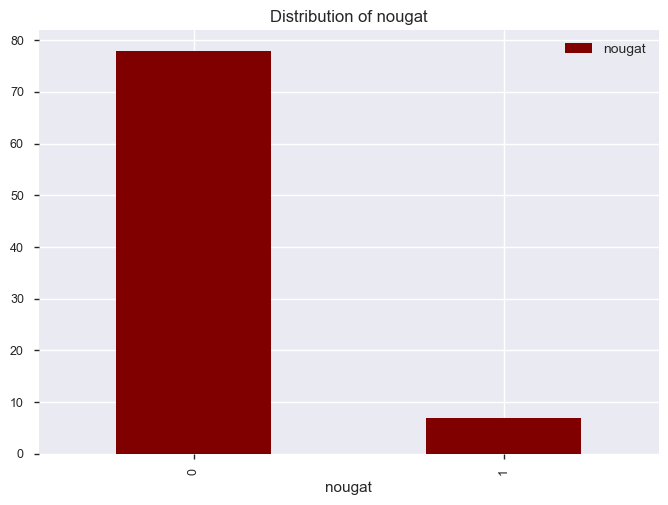

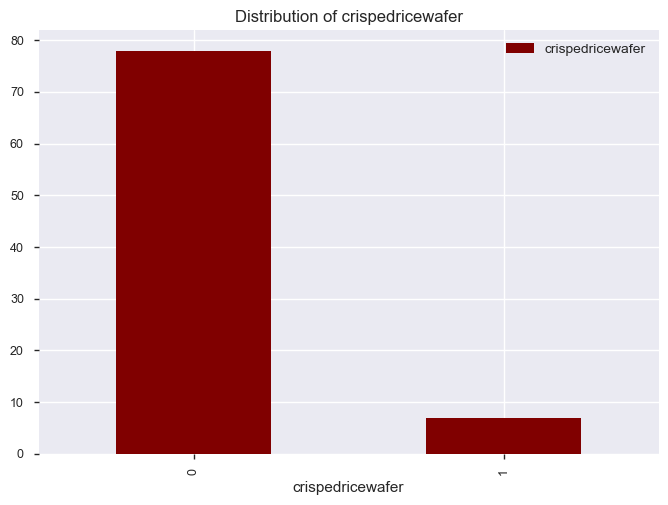

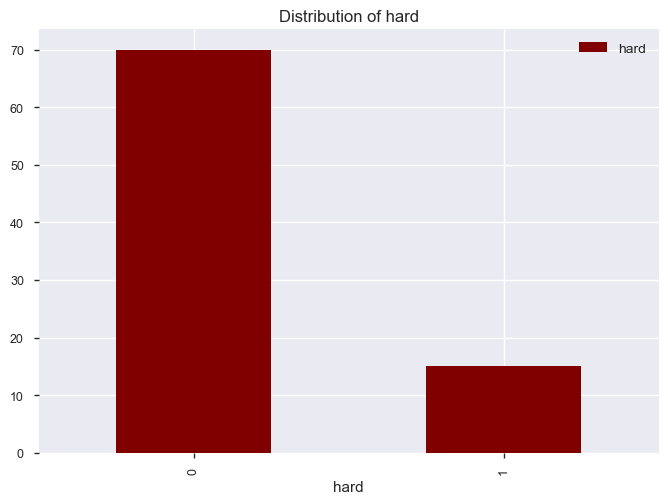

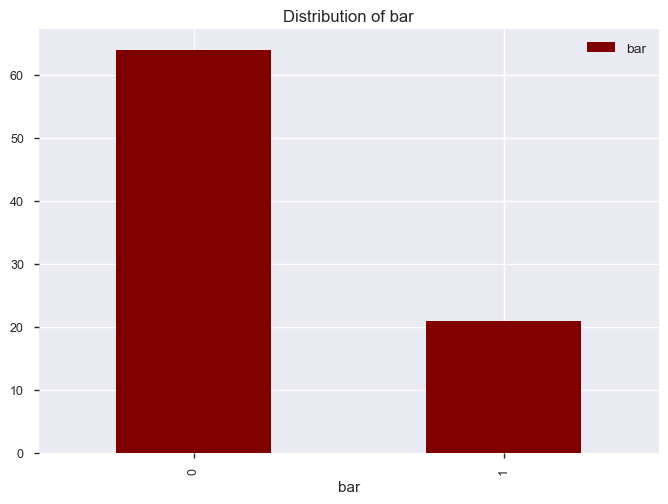

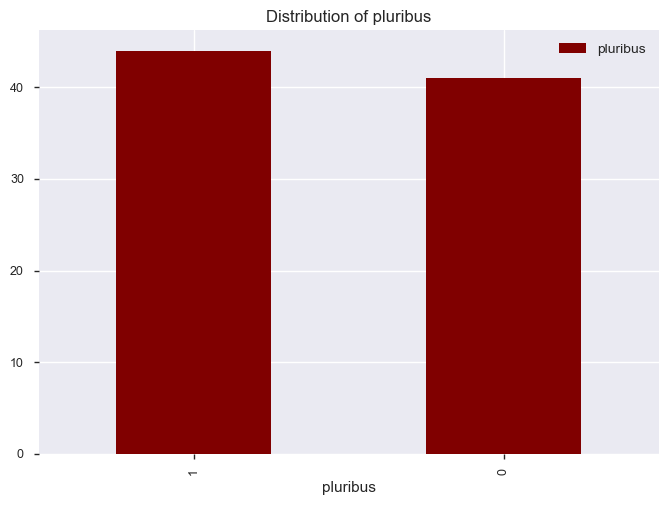

In [78]:
for i in candy_cat.columns.tolist():
    
    dist= pd.DataFrame(candy_cat[i].value_counts().sort_values(ascending=False)).reset_index()

    ax = dist.plot.bar(x='index',y=i,fontsize=9,color='maroon')

    ax.set_title("Distribution of "+i)
    ax.set_xlabel(i)

    plot.savefig('C:/project/Count plot for '+i+'.png', bbox_inches='tight')

## Pair Plots

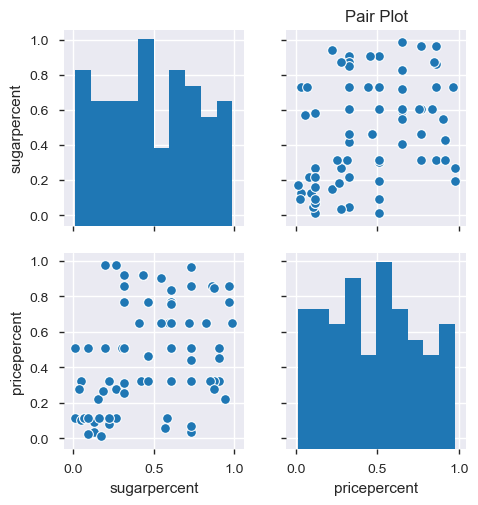

In [79]:
sns.pairplot(candy_data[["sugarpercent","pricepercent","winpercent"]],vars = ["sugarpercent","pricepercent"], dropna=True)
plot.title('Pair Plot') 
plot.savefig('C:/project/Pair plot for '+i+'.png', bbox_inches='tight')

## Observation

Very weak relationship between sugarpercent and pricepercent.

## Box Plot

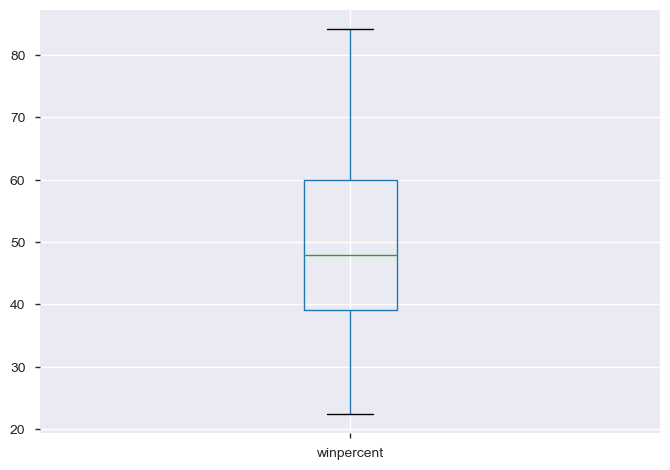

In [81]:
boxplot = candy_data.boxplot(column=['winpercent'])
plot.savefig('C:/project/box plot for '+i+'.png', bbox_inches='tight')

### Observation

From the box plot we can see that there are no such Outliers.

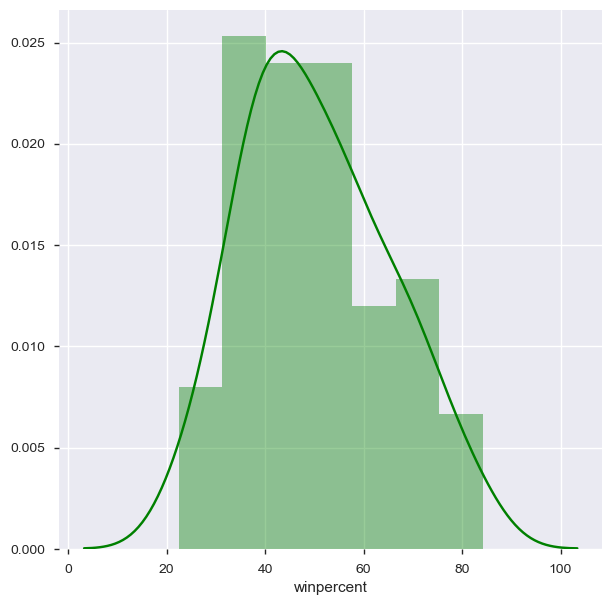

In [85]:
f, axes = plot.subplots(1, 1, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(candy_data.winpercent, color="g")

plot.savefig('C:/project/Distribution of win percent for '+i+'.png', bbox_inches='tight')

### Observation

Here the winpercent seems to be right skewed.

## SugarPercent Distribution

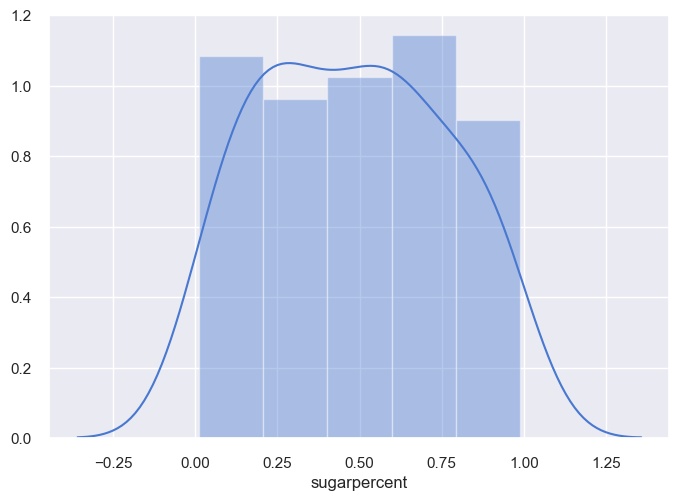

In [23]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(candy["sugarpercent"].dropna());
plot.savefig('C:/project/sugarpercent plot for '+i+'.png', bbox_inches='tight')

## observation

From the graph we can see that it is uniformly distributed.

## Calculating and Plotting Heat Map Correlation

In [24]:
#candy.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


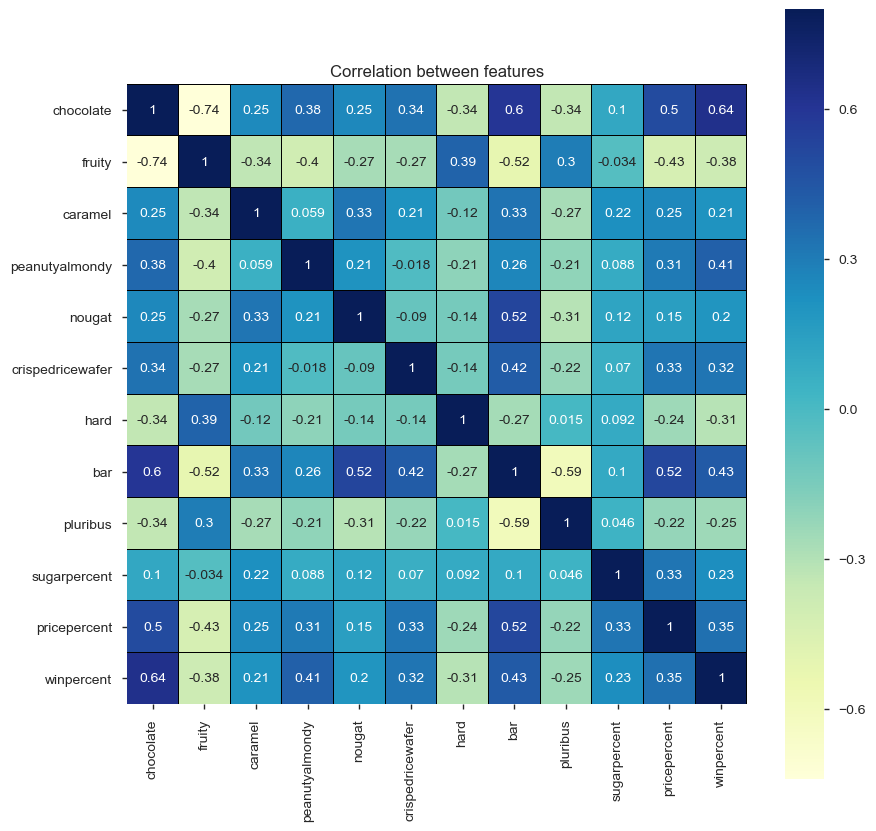

In [87]:
corr = candy.corr()
plot.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plot.title('Correlation between features')
plot.savefig('C:/project/correlation plot for.png', bbox_inches='tight')

### Observation

Here we can see that fruity and chocolate are corelated with each other and same with bar and pluribus.

## 6. LINEAR REGRESSION

###### 6.1 Preparing X and y in pandas

In [88]:
X = candy.loc[:,candy.columns != 'winpercent']
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [89]:
y = candy.winpercent

### 6.2 Splitting X and y into training and test datasets.

In [90]:
from sklearn.model_selection import train_test_split #package = sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [91]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
35,1,0,1,0,0,0,0,0,1,0.302,0.511
68,0,1,0,0,0,0,0,0,1,0.151,0.220
45,0,1,0,0,0,0,0,0,1,0.220,0.325
19,0,0,0,0,0,0,0,0,1,0.465,0.465
79,1,0,1,0,0,1,0,1,0,0.546,0.906
34,0,1,0,0,0,0,0,0,1,0.872,0.325
32,1,0,0,1,0,0,0,0,1,0.825,0.651
31,0,1,0,0,0,0,0,0,0,0.267,0.279
43,1,0,0,0,0,1,0,1,0,0.313,0.767
62,1,0,0,0,0,0,0,0,1,0.267,0.976


In [92]:
#scaling on X

from sklearn.preprocessing import StandardScaler #mean = 0 and SD = 1 
sc = StandardScaler()
sc.fit(X_train)                                                                                   # fit the data to Standardscaler

X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)    # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(X_trains, columns=X_train.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

   chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.159667 -0.915335  2.276361        -0.46291 -0.281718         -0.311086   
1  -0.862316  1.092496 -0.439298        -0.46291 -0.281718         -0.311086   
2  -0.862316  1.092496 -0.439298        -0.46291 -0.281718         -0.311086   
3  -0.862316 -0.915335 -0.439298        -0.46291 -0.281718         -0.311086   
4   1.159667 -0.915335  2.276361        -0.46291 -0.281718          3.214550   

      hard       bar  pluribus  sugarpercent  pricepercent  
0 -0.46291 -0.577350  1.029857     -0.705271      0.144174  
1 -0.46291 -0.577350  1.029857     -1.264003     -0.945144  
2 -0.46291 -0.577350  1.029857     -1.008688     -0.552091  
3 -0.46291 -0.577350  1.029857     -0.102137     -0.028020  
4 -0.46291  1.732051 -0.971008      0.197580      1.622802  


In [93]:
print(X_train.shape)
print(y_train.shape)

(68, 11)
(68,)


### 6.3 Linear regression in scikit-learn

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X_trains,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### 6.4  Interpreting Model Coefficients

In [96]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 50.38333748529411
Coefficients: [ 9.36003707  4.00992872 -1.32070992  3.22208481  2.07080638  4.53770851
 -2.41342001 -2.05089436 -1.4079862   3.09017666 -0.20615426]


In [97]:
feature_cols =  X_train.columns.to_list()        
feature_cols                                    

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']

In [98]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [99]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 50.38333748529411
chocolate 9.360037070693654
fruity 4.009928719615423
caramel -1.3207099211926565
peanutyalmondy 3.2220848066029553
nougat 2.070806384071033
crispedricewafer 4.537708513280591
hard -2.4134200088009363
bar -2.0508943593926214
pluribus -1.4079862032067463
sugarpercent 3.090176663874793
pricepercent -0.20615426331306783


How do we interpret the chocolate coefficient (_9.36003_)
- A "unit" increase in chocolate in candies is **associated with** a _"9.36003_ unit" increase in winpercent.




### 6.5 Using the Model for Prediction

In [45]:
y_pred_train = linreg.predict(X_trains)  

In [46]:
y_pred_test = linreg.predict(X_tests)       # threshold = 5

In [47]:
y_pred_test

array([55.10908166, 40.86918101, 52.10260665, 59.64778761, 59.07660229,
       44.61303163, 42.79443834, 39.50039241, 75.55900291, 55.82762664,
       40.0692605 , 62.83637085, 32.36419277, 40.0692605 , 36.00247316,
       62.77123871, 34.17200198])

## 7. Model evaluation 

## Model evaluation using Metrices

In [49]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [50]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 7.638014059243085
MAE for test set is 10.46415274230398


In [51]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [52]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 90.21124364486977
MSE for test set is 167.0518173524798


In [53]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [54]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 9.497959972797831
RMSE for test set is 12.924852701384252


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

###  Model Evaluation using Rsquared value.

In [100]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.17951576091173838 0.01834921394797273


In [101]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.06376105896877438 -1.995964611299922
